In [71]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<img src="https://raw.githubusercontent.com/LotusZaheer/Trabajo_Muestreo-Interferencia/master/Tarea%202/Banner.jpg" align="center"/>

<h4>Universidad Industrial de Santander</h4>
<h3>Inteligencia Artificial I - J1</h3>
<h3>Profesor Gustavo Adolfo Garzón Villamizar</h3>
<br>
Andrés Felipe Uribe García - 2160793
<br>
Julian Orlando Rodríguez Villamizar - 2170137

Los datos provienen del dataset https://www.kaggle.com/chetankv/dogs-cats-images el cual fue utilizado para un problema de clasificación binaria de perros y gatos


Para el preprocesado del dataset de gatos se utilizó un for en bash con la instrución 
<br>
convert i.jpg -colorspace Gray i.jpg
<br>
La cual transforma todas las imagenes de color a escala de grises utilizando la aplicación ImageMagick, la cual tambien ofrece otro tipo de transformaciones
<br>
Tutorial rapido: https://blog.desdelinux.net/como-manipular-imagenes-desde-el-terminal/
Proyecto: https://github.com/ImageMagick/ImageMagick


In [72]:
import os
import PIL #Manipular las imagenes del error de plt
import numpy as np
import tensorflow as tf
from random import randint
import matplotlib.pyplot as plt
from IPython.display import Image #Error de plt
from tensorflow.keras.layers import *
from IPython.display import clear_output
from keras.models import Sequential, Model

In [73]:
IMG_SIZE = 128 #A 256 demora una eternidad

#Ruta Raiz
PATH = "/content/drive/My Drive/BN_CL/"

#Datos de entrada a Blanco y negro
INPATH = PATH + "train/"

#Datos de Esperados a Color
OUTPATH = PATH + "target/"

#Cargamos SOLO el nombre de las imagenes en un listado
imgurls = !ls -1 "{INPATH}"

In [74]:
#Repara el error de plt.imshow
for image in imgurls:
  img = PIL.Image.open(INPATH + image)
  img = img.convert(mode='RGB')
  img.save(INPATH + image)
#rof

n=1000
#Tamaño del test del 20%
train_n = round(n*0.8)

#Listado randomizado
randurls = np.copy(imgurls)

np.random.seed(23)
np.random.shuffle(randurls)

#Partición de test y train
tr_urls = randurls[:train_n]
ts_urls = randurls[train_n:]

print( "Tamaño del dataset :", len(imgurls))
print( "Tamaño de los datos de entrenamiento :", len(tr_urls))
print( "Tamaño de los datos de testeo :", len(ts_urls))

Tamaño del dataset : 1000
Tamaño de los datos de entrenamiento : 800
Tamaño de los datos de testeo : 200


In [75]:
#Para reducir el costo computacional
@tf.function
def rescalado(inimg, tgimg, height, width):
  inimg = tf.image.resize(inimg, [height, width])
  tgimg = tf.image.resize(tgimg, [height, width])

  return inimg, tgimg

In [76]:
#En lugar de trabajar con valores de 0 a 255
#usamos datos entre -1 y 1
def normalizado(inimg, tgimg):
  #Tanh trabaja de -1 a 1 por lo cual para aprovechar su dominio no trabajaremos de 0 a 1 
  #si no de -1 a 1
  #Ver en capa resultado ↓↓↓↓↓↓↓↓
  inimg = (inimg /127.5) -1
  tgimg = (tgimg /127.5) -1
  return inimg, tgimg

In [77]:
#Cargamos las imagenes
#Nombre del archivo 
@tf.function
def load_image(nombre):

  #No lo comprendo en su totalidad :U
  #####Buscar documentacion#####
  inimg = tf.cast(tf.image.decode_jpeg(tf.io.read_file(INPATH + nombre)), tf.float32)[..., :3]
  tgimg = tf.cast(tf.image.decode_jpeg(tf.io.read_file(OUTPATH + nombre)), tf.float32)[..., :3]
  
  #Cargamos las imagenes e inmediatamente las rescalamos
  #El mismo tamaño para altura y ancho
  inimg, tgimg = rescalado(inimg, tgimg, IMG_SIZE, IMG_SIZE)

  #Normalizamos
  inimg, tgimg = normalizado(inimg, tgimg) 

  return inimg, tgimg

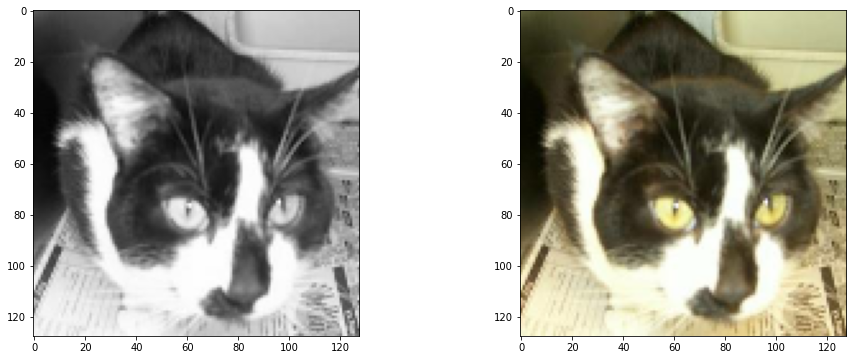

<tf.Tensor: shape=(128, 128, 3), dtype=float32, numpy=
array([[[-0.2436887 , -0.23584557, -0.5025122 ],
        [-0.2515931 , -0.24374998, -0.5104166 ],
        [-0.28310233, -0.2752592 , -0.54192585],
        ...,
        [ 0.55807424,  0.58160365,  0.22866237],
        [ 0.5529413 ,  0.57647073,  0.22352946],
        [ 0.5492035 ,  0.5727329 ,  0.21979177]],

       [[-0.29261637, -0.28477323, -0.5514399 ],
        [-0.31542796, -0.30758482, -0.57425153],
        [-0.34005457, -0.33221143, -0.59887815],
        ...,
        [ 0.5529413 ,  0.57647073,  0.22352946],
        [ 0.5451113 ,  0.5686407 ,  0.21569955],
        [ 0.55631137,  0.5798408 ,  0.22689962]],

       [[-0.32795763, -0.3201145 , -0.5867812 ],
        [-0.3684436 , -0.36060047, -0.6272671 ],
        [-0.38242352, -0.37458038, -0.64124703],
        ...,
        [ 0.5461185 ,  0.5696479 ,  0.21670675],
        [ 0.54025745,  0.56378686,  0.21084571],
        [ 0.5324143 ,  0.5559437 ,  0.20300257]],

       ...,

     

In [78]:
#Probamos la función load_image
#Visualizamos las imagenes para ver el material a trabajar
#randurls[imagen])[BW=0;Color=1])
#Una imagen aletoria cada vez
rimg = randint(0,n)
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.imshow( ((load_image(randurls[rimg])[0])+1)/2 )
plt.subplot(1,2,2)
plt.imshow( ((load_image(randurls[rimg])[1])+1)/2 )
plt.show()
#En numeriños :u
(load_image(randurls[rimg])[1])

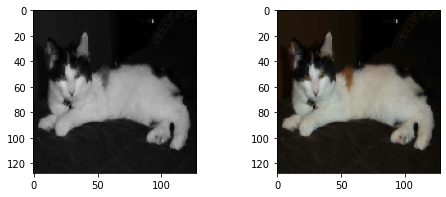

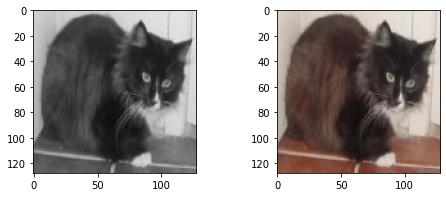

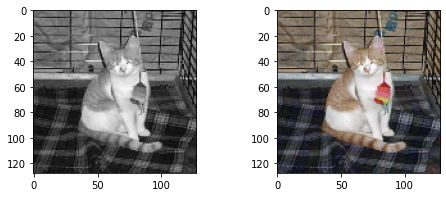

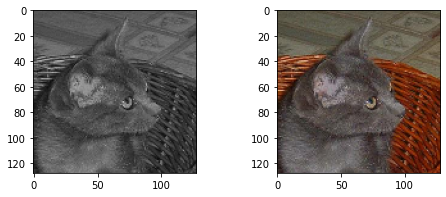

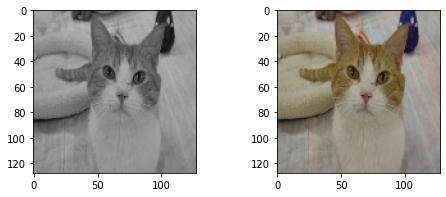

In [79]:
# :v/ Al fin el dataset como tal \v:

#Cargamos el listado de direcciones
X_train = tf.data.Dataset.from_tensor_slices(tr_urls)
X_test = tf.data.Dataset.from_tensor_slices(ts_urls)

#Cargamos las imagenes con nuestra funcion
#¡IMPORTANTE! Revisar el numero de hilos o verás el azul dominar tu pantalla :u
X_train = X_train.map(load_image, num_parallel_calls=tf.data.experimental.AUTOTUNE) #Mejor dejarlo en automatico
X_test = X_test.map(load_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)

#Distribuimos los datos por lotes
X_train = X_train.batch(1)
X_test = X_test.batch(1)


#Probamos que las imagenes se hayan cargado en el dataset
#Visualizamos las imagenes
for inimg, tgimg in X_train.take(5):
  plt.figure(figsize=(8,3))
  plt.subplot(1,2,1)
  plt.imshow(((inimg[0,...])+1)/2) #En caso de ignorar los lotes -> (((tgimg)+1)/2)
  plt.subplot(1,2,2)
  plt.imshow(((tgimg[0,...])+1)/2)
  plt.show()
#rof

In [80]:
#Downsampling
def Compresion(filtros, batch_norm=True):
  
  #Capas, como una cebolla
  C = Sequential()
  #Ruido Gausiano de media 0 y desviación estandar de 0.02 
  initializer = tf.random_normal_initializer(0, 0.02)

  #Capa convolucional
  C.add(Conv2D(filtros,
               kernel_size=4,
               strides=2, #Vamos reduciendo el tamaño de imagen a la mitad
               padding="same",
               kernel_initializer=initializer,
               use_bias=not batch_norm))
  
  #Capa de Batch
  if batch_norm:
    C.add(BatchNormalization())
  #Capa de activación
  C.add(ReLU())
  return C

In [81]:
#Upsampling
def Expansion(filtros, dropout=True):
  
  #Capas, como una cebolla
  E = Sequential()
  #Ruido Aleatorio
  initializer = tf.random_normal_initializer(0, 0.02)

  #Capa convolucional
  E.add(Conv2DTranspose(filtros,
                        kernel_size=4,
                        strides=2, #Vamos reduciendo el tamaño de imagen a la mitad
                        padding="same",
                        kernel_initializer=initializer,
                        use_bias=False))

  #Capa de Batch para trabajar por lotes
  if dropout:
    E.add(Dropout(0.5))

  #Capa de activación
  E.add(ReLU())

  return E

In [82]:
def Generador():
  
  inputs = Input(shape=[None, None, 3]) #Img_size no especificados, 3 colores

  Encoder = [         #Tamaño
      Compresion(64, batch_norm=False), #128
      Compresion(128),#64
      Compresion(256),#32
      Compresion(256),#16
      Compresion(256),#8
      Compresion(256),#4
      Compresion(256),#2
  ]
  
  Decoder = [        #Tamaño
      Expansion(256),#4
      Expansion(256),#8
      Expansion(256, dropout=False),#16
      Expansion(256, dropout=False),#32
      Expansion(128, dropout=False),#64
      Expansion(64, dropout=False), #128
  ]


  I = tf.random_normal_initializer(0, 0.02)
  
  #Tamaño 128
  Resultado = Conv2DTranspose(filters=3,
                              kernel_size=4,
                              strides=2,
                              padding="same",
                              kernel_initializer=I, 
                              activation='tanh') #Errores con la normalización
  
  x = inputs
  s = [] #Lista con los saltos de conexión 
  concat = Concatenate()

  #Pasamos el resultado de cada capa a la siguiente
  for i in Encoder:
    x = i(x)
    s.append(x)
  #rof

  #La primera en entrar debe ser la ultima en salir
  #El elemento de la capa de tamaño 1 al ser el centro la eliminamos
  s = reversed(s[:-1]) 
  
  
  for j, sl in zip(Decoder, s):
    x = j(x)
    x = concat([x, sl]) #Concexion de los datos que saltaron
  #rof

  output = Resultado(x)

  return Model(inputs=inputs, outputs=output) 
 

In [83]:
#Utilizaremos un patchGAN discriminator :u
#En lugar de Evaluar por imagenes lo haremos por parches
#aprovechando que tenemos el codigo por piezas

def Discriminador():
  ini = Input(shape=[None, None, 3], name="input_img")
  gen = Input(shape=[None, None, 3], name="gen_img")

  con = concatenate([ini, gen])

  I = tf.random_normal_initializer(0, 0.02)
  
  dec1 = Compresion(32, batch_norm=False)(con)
  dec2 = Compresion(64)(dec1)
  dec3 = Compresion(128)(dec2)
  dec4 = Compresion(256)(dec3)
  
  Resultado = Conv2DTranspose(filters=1,
                              kernel_size=4,
                              strides=1,
                              kernel_initializer=I, 
                              padding="same")(dec4)
  
  return Model(inputs=[ini, gen], outputs=Resultado)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


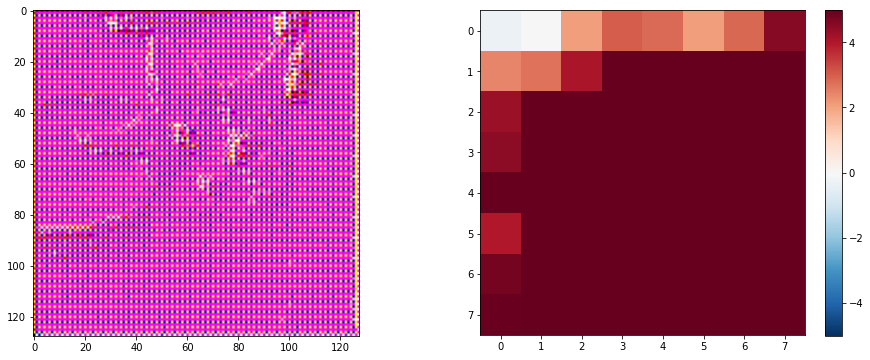

In [84]:
#Test de ejemplo:
#Lo que genera el modelo
G = Generador()
og = G(((inimg+1)*255), training=False) 

#Test de ejemplo:
#Lo que considera es falso
D = Discriminador()
od = D([((inimg+1)*255), og], training=False)

#PLoteamos para ver las diferencias
plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
plt.imshow(og[0,...])

plt.subplot(1,2,2)
plt.imshow(od[0,...,-1],
           vmin=-5, vmax=5,
           cmap='RdBu_r') #'RdBu_r'
plt.colorbar()
plt.show()

In [85]:
#Entropía cruzada de cada pixel obtenido
#'from_logits' con ella normalizamos para qeu exista en [0. .1]
loss_object = tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [86]:
#Evaluamos el Discriminador

#Con ella vamos a tomar los datos del generador y el discriminador 
#para que así vayan mejorando uno a la par del otro
def discrimator_loss(real_output, pred_output):
  
  #Diferencia entre la imagen real y lo que el discriminador piensa es real
  #Con ones_like establecemos que la imagen es real, dando por buena toda su extensión 
  real_loss = loss_object(tf.ones_like(real_output), real_output)
  
  #Diferencia entre la imagen predicha y lo que el discriminador piensa es real
  #Con zero_like establecemos que la imagen es predicha, dando por falsa toda su extensión 
  pred_loss = loss_object(tf.zeros_like(pred_output), pred_output)
  
  #Sumamos las diferencias de ambas operaciones
  total_loss = real_loss + pred_loss

  return total_loss

In [87]:
#Evaluamos el Generador
L = 100 

#El mapa generado por el discriminador, Imagen generada y la imagen esperada
def generator_loss(output_disc, pred_output, target):

  #Diferencia entre la imagen predicha y lo que el discriminador piensa es real
  #Con ones_like establecemos que la imagen es predicha es adecuada dandola por verdadera
  gan_loss = loss_object(tf.ones_like(output_disc), output_disc)
  
  #Error absoluto
  #La diferencia entre lo que generamos y lo esperabamos
  abs_loss = tf.reduce_mean(tf.abs(target - pred_output))

  #Multiplicando por Lambda damos un mayor valor al error absoluto de la predicción
  total_loss =  gan_loss +(L * abs_loss)
  
  return total_loss

In [88]:
#Optimizamos utilizando Adam con los valores
generador_optimizer = tf.keras.optimizers.Adam()
discriminador_optimizer = tf.keras.optimizers.Adam()

#Creamos el generador y el discriminador
generator = Generador()
discriminator = Discriminador()

In [89]:
#Para visualizar en cada etapa

def generate_images(model, ts_input, tar, save_filename=False, display_imgs=True):
  
  prediction = model(ts_input, training=True)

  if save_filename:
    tf.keras.preprocessing.image.save_img(PATH + 'output/' + save_filename + '.jpg', prediction[0,...])
    
  plt.figure(figsize=(16,6))
  
  plt.subplot(1, 3, 1)
  plt.title('Entrada')
  plt.imshow(ts_input[0])
  plt.axis('off')
  
  plt.subplot(1, 3, 2)
  plt.title('Ground Truth')
  plt.imshow(tar[0])
  plt.axis('off')
  
  plt.subplot(1, 3, 3)
  plt.title('Predición')
  plt.imshow(prediction[0])
  plt.axis('off')
  plt.show()

In [90]:
#Entrenamos el modelo
#Pasamos la imagen de entrada y la imagen esperada
def train_step(input_image, target):
  
  with tf.GradientTape() as gen_tape, tf.GradientTape() as discr_tape:
    
    #Imagen de salida a partir de la de entrada
    output_image = G(input_image, training=True)

    #Pasamos la imagen generada y la imagen de entrada
    output_pred_discr = D([output_image, input_image], training=True)

    #Imagen esperada y la imagen de entrada
    output_target_discr = D([target, input_image], training=True)

    #Recibimos la evaluación del discriminador
    discr_loss = discrimator_loss(output_target_discr, output_pred_discr)
    #Recibimos la evaluación del generador
    gen_loss = generator_loss(output_pred_discr,output_image, target)

    #Calculamos el descenso del gradiente del generador
    generator_grads = gen_tape.gradient(gen_loss, G.trainable_variables)
    #Calculamos el descenso del gradiente del discriminador
    discriminator_grads = discr_tape.gradient(discr_loss, D.trainable_variables)

    generador_optimizer.apply_gradients(zip(generator_grads, G.trainable_variables))
    discriminador_optimizer.apply_gradients(zip(discriminator_grads, D.trainable_variables))

In [91]:
def train(dataset, epochs):
  for epoch in range(epochs):

    imgi = 0
    for input_image, target in dataset:
      print ('epoch ' + str(epoch) + ' -> Entrenando -> ' + str(imgi) + '/' + str(len(tr_urls)))
      imgi = imgi + 1
      train_step(input_image, target)
      clear_output(wait=True) 
    #rof 

    for inp, tar in X_test.take(4):
      generate_images(G, inp, tar, str(imgi) + '_' + str(epoch), display_imgs=True)
    #rof
  #rof


In [ ]:
train(X_train, 100)

epoch 22 -> Entrenando -> 413/800
